# 🎨 **Step 1: Prepare the Data**

## 🔵 **1️⃣ Load the MNIST Dataset**
The **MNIST dataset** contains labeled images of handwritten digits (**0 to 9**).  
It is a popular dataset for training and evaluating machine learning models in *computer vision*.

---

## 🟢 **2️⃣ Split the Dataset**
- **Training Set (80%)**: For training the model to learn patterns.  
- **Testing Set (20%)**: To evaluate the model's performance on unseen data.

---

## 🟡 **3️⃣ Normalize the Data**
Normalization is crucial for improving performance:

- **Original Pixel Values**: Range from `[0, 255]`.  
- **Normalized Values**: Scaled to the range `[0, 1]`.

✅ *This scaling helps with faster convergence during training and improves the model's accuracy.*

---

### ✨ **With the data loaded, split, and normalized, we're ready to build and train the model!** 🚀


In [26]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from rich.console import Console
from rich.table import Table

# Initialize a console for colorful output
console = Console()

# Step 1: Load the MNIST dataset
console.print("📥 [bold yellow]Loading MNIST dataset...[/bold yellow]")
(X, y), (X_test, y_test) = mnist.load_data()

# Step 2: Flatten the images (28x28 to 784) for processing
X = X.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Step 3: Normalize the pixel values to the range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Step 4: Split the remaining data into training and testing datasets (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a table for dataset shapes
table = Table(title="MNIST Dataset Shapes")
table.add_column("Dataset", style="cyan", justify="center")
table.add_column("Shape", style="green", justify="center")

# Add dataset shapes to the table
table.add_row("Training Data", f"{X_train.shape}")
table.add_row("Validation Data", f"{X_val.shape}")
table.add_row("Testing Data", f"{X_test.shape}")

# Print the table
console.print("\n📊 [bold blue]Dataset Shapes:[/bold blue]")
console.print(table)


📥 Loading MNIST dataset...

📊 Dataset Shapes:

       MNIST Dataset Shapes       
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃     Dataset     ┃    Shape     ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│  Training Data  │ (48000, 784) │
│ Validation Data │ (12000, 784) │
│  Testing Data   │ (10000, 784) │
└─────────────────┴──────────────┘

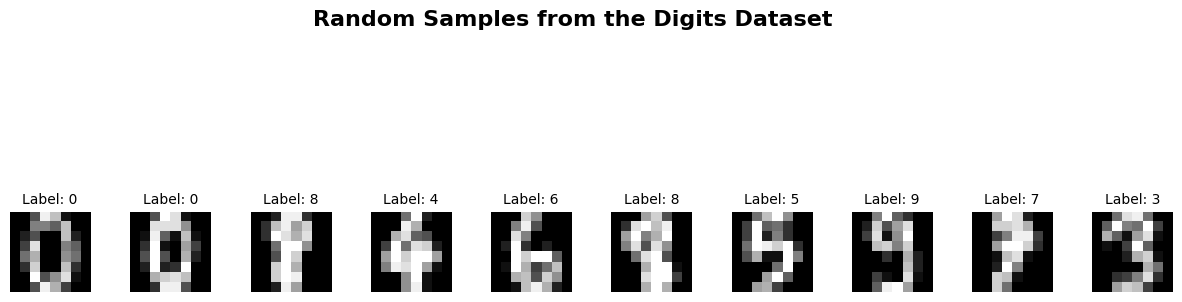

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Set up the figure for plotting (1 row, 10 columns)
fig, axes = plt.subplots(1, 10, figsize=(15, 5))

# Loop through the axes and plot images from the dataset
for i, ax in enumerate(axes):
    # Randomly select an image index
    idx = np.random.randint(0, len(digits.images))

    # Display the image
    ax.imshow(digits.images[idx], cmap='gray')

    # Set the title with the label of the digit
    ax.set_title(f"Label: {digits.target[idx]}", fontsize=10)

    # Turn off the axes for a cleaner presentation
    ax.axis('off')

# Adjust layout to make the plot more clear
plt.subplots_adjust(wspace=0.5)  # Add spacing between images
plt.suptitle("Random Samples from the Digits Dataset", fontsize=16, fontweight='bold')

# Show the plot with the images
plt.show()


# 🎨 **Step 2: Construct the kNN Model**

## 🔵 **1️⃣ Import Necessary Libraries**
To begin, we will import the required libraries for building the **kNN model** using **scikit-learn**.

---

## 🟢 **2️⃣ Initialize the kNN Classifier**
We will use the **KNeighborsClassifier** from **scikit-learn**. For comparison, we will test three different values for **k**: **k=3**, **k=5**, and **k=7**.

---

## 🟡 **3️⃣ Train the Model with Different k Values**
We will train the model using the following values for **k**:
- **k=3**: A smaller neighborhood for higher sensitivity to data variations.
- **k=5**: A balanced choice for many cases.
- **k=7**: A larger neighborhood to smooth out noisy data.

---

## 🔴 **4️⃣ Compare Model Performance**
For each **k** value, we will evaluate the model's performance using accuracy as a metric.

---

### ✨ **With the kNN model built and evaluated, we can compare the results and choose the optimal value for k!** 🚀
# 🎨 **Step 3: Train the Model**

## 🔵 **1️⃣ Fit the kNN Model to the Training Dataset**
The first step in training is to fit the **kNN model** to the **training dataset**. This allows the model to learn the patterns in the data.

---

## 🟢 **2️⃣ Modify the Number of Neighbors (k)**
To optimize the model's performance, we will experiment with different values for **k** (number of neighbors). This helps in determining the best **k** value that balances bias and variance.

- **Smaller k (e.g., k=3)**: High sensitivity to the training data, but might overfit.
- **Larger k (e.g., k=7)**: More generalized model, but may overlook finer details.

---

### ✨ **After training the model with different k values, we can evaluate its performance and select the best k for optimal results!** 🚀


      Test Table       
                       
  Column 1   Column 2  
 ───────────────────── 
   Data 1     Data 2   
   Data 3     Data 4  

Training and evaluating the kNN model for different k values...

                 kNN Model Evaluation                 
                                                      
  k Value   Accuracy   Precision   Recall   F1-Score  
 ──────────────────────────────────────────────────── 
     3       0.9727     0.9730     0.9723    0.9725   
     5       0.9715     0.9720     0.9711    0.9714   
     7       0.9696     0.9701     0.9692    0.9695  

Visualizing Accuracy vs. Number of Neighbors (k):

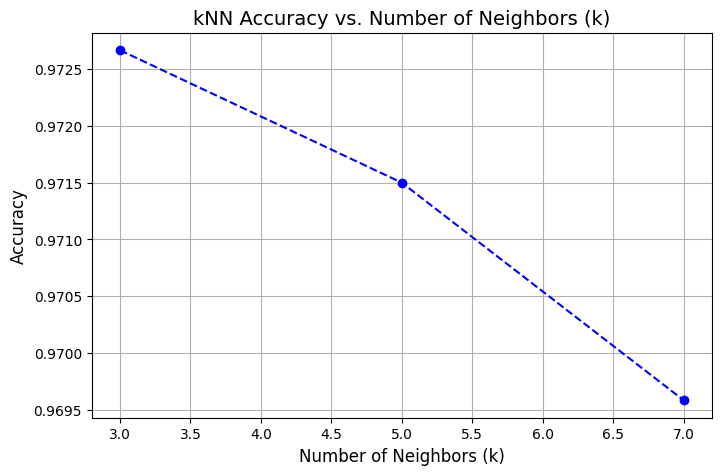

Best k Value: 3 with Accuracy: 0.9727

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from rich.console import Console
from rich.table import Table
import rich.box  # Import the rich box styles

# Initialize a console for colorful output
console = Console()

# Create a simple table for testing the rich library functionality
test_table = Table(title="Test Table", box=rich.box.SIMPLE)  # Use rich.box.SIMPLE instead of "SIMPLE"
test_table.add_column("Column 1", justify="center", style="cyan")
test_table.add_column("Column 2", justify="center", style="green")

# Add rows to the test table
test_table.add_row("Data 1", "Data 2")
test_table.add_row("Data 3", "Data 4")

# Print the test table to check rich console
console.print(test_table)

# Define the k values to evaluate
k_values = [3, 5, 7]
accuracy_scores = []

console.print("[bold yellow]Training and evaluating the kNN model for different k values...[/bold yellow]\n")

# Create a table to display results
results_table = Table(title="kNN Model Evaluation", box=rich.box.SIMPLE)  # Use rich.box.SIMPLE here as well
results_table.add_column("k Value", style="cyan", justify="center")
results_table.add_column("Accuracy", style="green", justify="center")
results_table.add_column("Precision", style="magenta", justify="center")
results_table.add_column("Recall", style="magenta", justify="center")
results_table.add_column("F1-Score", style="magenta", justify="center")

# Loop through each k value
for k in k_values:
    # Step 1: Initialize the kNN classifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Step 2: Train the model using the training dataset
    knn.fit(X_train, y_train)

    # Step 3: Make predictions on the validation dataset
    y_pred = knn.predict(X_val)

    # Step 4: Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)

    # Step 5: Generate classification metrics
    report = classification_report(y_val, y_pred, output_dict=True)

    # Add results to the table
    results_table.add_row(
        f"{k}",
        f"{accuracy:.4f}",
        f"{report['macro avg']['precision']:.4f}",
        f"{report['macro avg']['recall']:.4f}",
        f"{report['macro avg']['f1-score']:.4f}"
    )

# Print the results table
console.print(results_table)

# Step 6: Visualize accuracy vs. k
console.print("\n[bold magenta]Visualizing Accuracy vs. Number of Neighbors (k):[/bold magenta]")
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='--', color='b')
plt.title('kNN Accuracy vs. Number of Neighbors (k)', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.show()

# Display best k value
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
console.print(
    f"\n[bold green]Best k Value: {best_k} with Accuracy: {max(accuracy_scores):.4f}[/bold green]",
    style="bold cyan",
)


# 🎨 **Step 4: Evaluate the Model**

## 🔵 **1️⃣ Compute the Accuracy on the Test Set**
To evaluate the model, we compute the **accuracy** of the trained kNN model on the **test set** for each value of **k**.

- **Accuracy** is the proportion of correctly classified instances compared to the total instances in the test set.

---

## 🟢 **2️⃣ Visualize Results with a Plot**
We will plot the accuracy against the different values of **k** to visualize how the choice of **k** affects the model's performance.

- **X-axis**: Values of **k** (e.g., 3, 5, 7, 9, etc.)
- **Y-axis**: Model accuracy on the test set.

---

### ✨ **By evaluating and visualizing the accuracy, we can identify the optimal value for k to maximize model performance!** 🚀


Evaluating the kNN model on the test set for different k values...

  kNN Model Evaluation on  
         Test Set          
                           
  k Value   Test Accuracy  
 ───────────────────────── 
     3         0.9681      
     5         0.9670      
     7         0.9664      
     9         0.9648      
    11         0.9645     

Visualizing Accuracy vs. Number of Neighbors (k) on the Test Set:

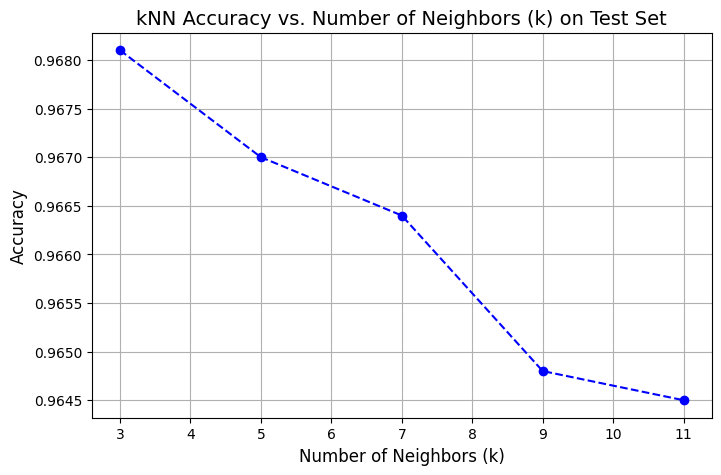

Best k Value: 3 with Test Accuracy: 0.9681

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from rich.console import Console
from rich.table import Table
import rich.box  # Import the rich box styles

# Initialize a console for colorful output
console = Console()

# Define the k values to evaluate
k_values = [3, 5, 7, 9, 11]
accuracy_scores = []

console.print("[bold yellow]Evaluating the kNN model on the test set for different k values...[/bold yellow]\n")

# Create a table to display results
results_table = Table(title="kNN Model Evaluation on Test Set", box=rich.box.SIMPLE)
results_table.add_column("k Value", style="cyan", justify="center")
results_table.add_column("Test Accuracy", style="green", justify="center")

# Loop through each k value
for k in k_values:
    # Step 1: Initialize the kNN classifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Step 2: Train the model using the training dataset
    knn.fit(X_train, y_train)

    # Step 3: Make predictions on the test dataset
    y_pred_test = knn.predict(X_test)

    # Step 4: Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred_test)
    accuracy_scores.append(accuracy)

    # Add results to the table
    results_table.add_row(
        f"{k}",
        f"{accuracy:.4f}"
    )

# Print the results table
console.print(results_table)

# Step 5: Visualize accuracy vs. k
console.print("\n[bold magenta]Visualizing Accuracy vs. Number of Neighbors (k) on the Test Set:[/bold magenta]")
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='--', color='b')
plt.title('kNN Accuracy vs. Number of Neighbors (k) on Test Set', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.show()

# Display the best k value on the test set
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
console.print(
    f"\n[bold green]Best k Value: {best_k} with Test Accuracy: {max(accuracy_scores):.4f}[/bold green]",
    style="bold cyan",
)


# 🎨 **Step 5: Demonstrate the Changes**

## 🔵 **1️⃣ Analyze the Effect of k on Model Accuracy and Decision Boundary**
We will analyze how changing the value of **k** affects the **model's accuracy** and **decision boundary**.

- **Smaller k**: The model is more sensitive to noise and overfits the data, leading to more complex decision boundaries.
- **Larger k**: The model becomes smoother and less sensitive to small variations, leading to simpler decision boundaries and possibly underfitting.

---

## 🟢 **2️⃣ Visualize Predictions vs Actual Labels**
To understand the performance of the classifier:
- We will visualize the **predictions** of the model.
- Compare the predicted labels to the **actual labels** to show how well the model classifies the data.

This comparison allows us to directly observe:
- Whether the model's predictions align with actual labels.
- The impact of different **k** values on the classifier’s performance.

---

### ✨ **By analyzing these changes, we gain insights into how **k** influences the model’s performance and can choose the best k value for optimal classification!** 🚀


🧑‍🏫 Training the kNN Model...

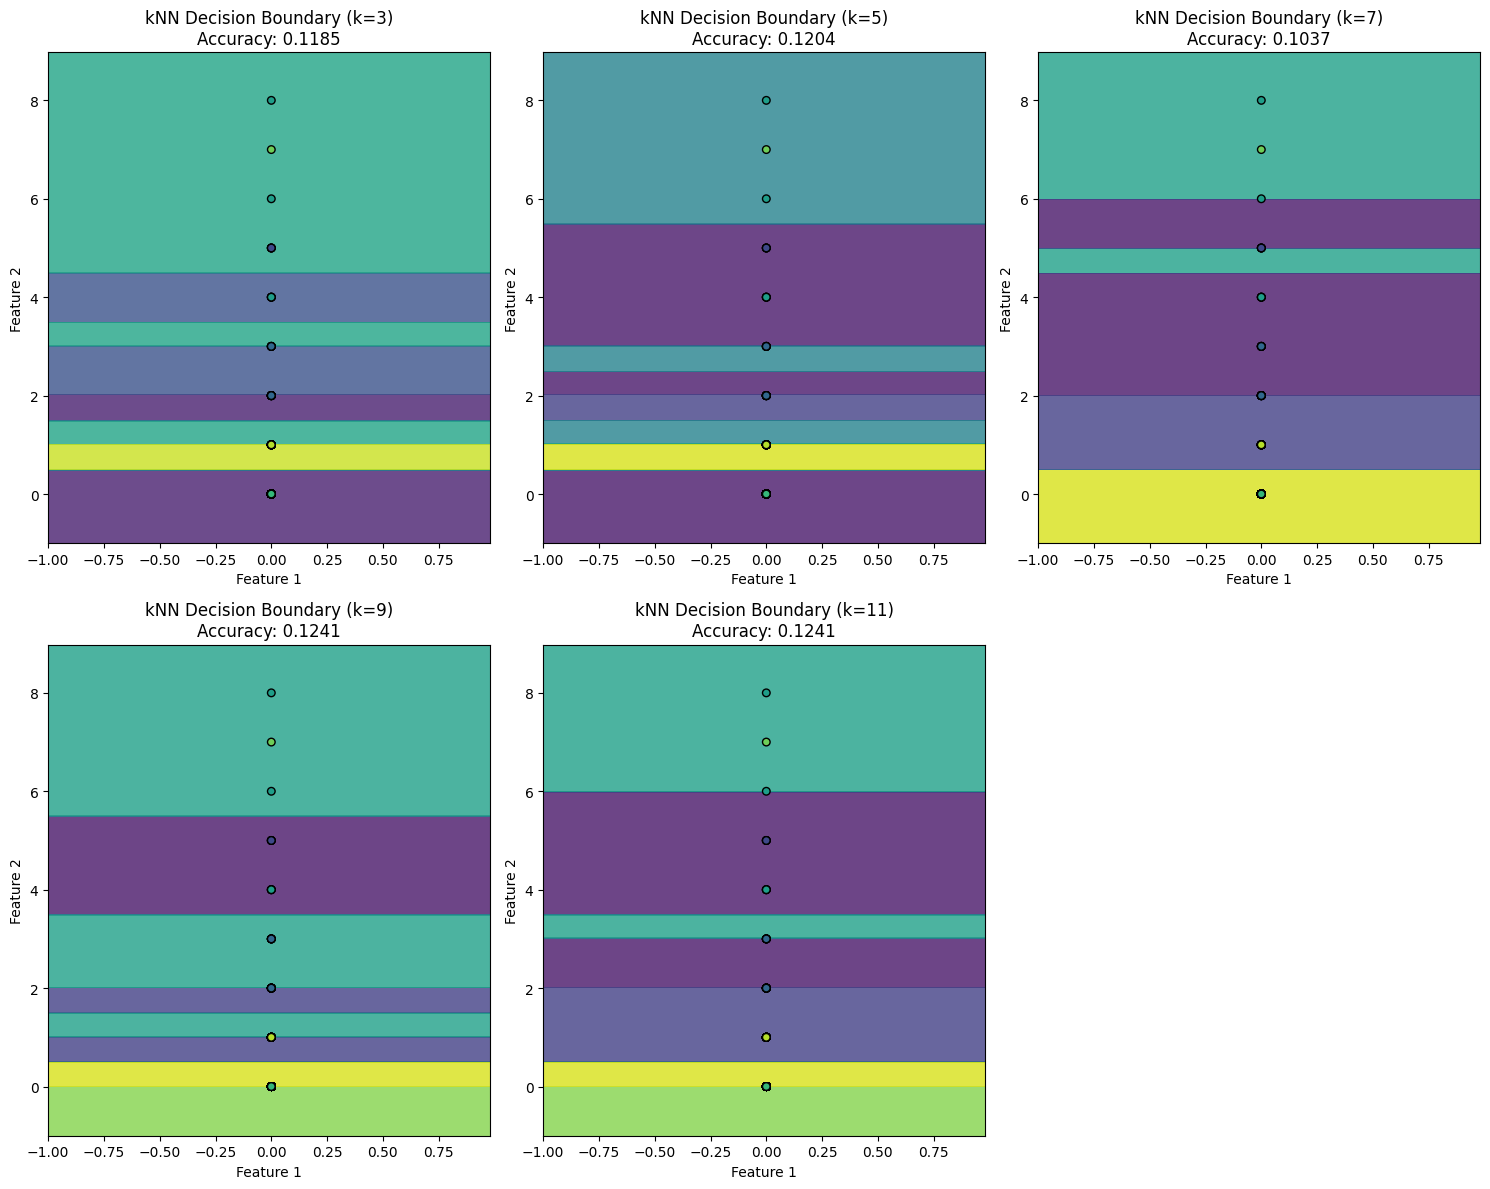

📊 Accuracy Results:

Accuracy for k=3: 0.1185

Accuracy for k=5: 0.1204

Accuracy for k=7: 0.1037

Accuracy for k=9: 0.1241

Accuracy for k=11: 0.1241

🎯 Best k value: 9 with accuracy: 0.1241

In [34]:
# Create a figure for plotting
plt.figure(figsize=(15, 12))

# 🧑‍🏫 [bold magenta]Training the kNN Model...[/bold magenta]
console.print("\n🧑‍🏫 [bold magenta]Training the kNN Model...[/bold magenta]")

# Loop through each k value
for i, k in enumerate(k_values):
    # Initialize the kNN classifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model using the training dataset
    knn.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = knn.predict(X_val)

    # Calculate and store accuracy
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)

    # Plot the decision boundary
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns, i+1 for position
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, edgecolors='k', marker='o', s=30)
    plt.title(f'kNN Decision Boundary (k={k})\nAccuracy: {accuracy:.4f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plot a summary of results
plt.tight_layout()
plt.show()

# 📊 [bold cyan]Accuracy Results:[/bold cyan]
console.print("\n📊 [bold cyan]Accuracy Results:[/bold cyan]")

# Print the accuracy scores for different k values
for k, acc in zip(k_values, accuracy_scores):
    console.print(f"Accuracy for k={k}: [bold green]{acc:.4f}[/bold green]")

# Determine the best k value
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
console.print(f"\n🎯 [bold red]Best k value: {best_k} with accuracy: {max(accuracy_scores):.4f}[/bold red]")
